We can publish image data with MQTT and view with an appropriate camera, e.g. in HA -> https://www.home-assistant.io/components/camera.mqtt/

Link for publishing -> https://github.com/WakeupTsai/docker-rpi-camera-mqtt/blob/master/image-mqtt.py

In [1]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

import paho.mqtt.client as mqtt

broker = "localhost"
topic = 'camera/'
port = 1883

In [2]:
# Reqired callbacks
def on_connect(client, userdata, flags, rc):
    print(f"CONNACK received with code {rc}")
    if rc==0:
        print("connected OK")
    else:
        print("Bad connection Returned code=",rc)

def on_publish(client, userdata, mid):
    print("mid: "+str(mid))        

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload)) 

In [3]:
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.on_publish = on_publish

#client.username_pw_set(username, password)
client.connect(broker, port=port)
client.loop_start()
client.subscribe(topic)

CONNACK received with code 0

(0, 1)


connected OK


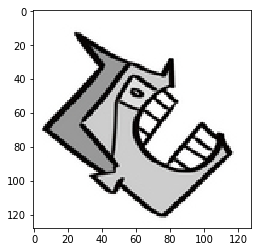

In [13]:
image_file = 'small.jpg'
image = Image.open(image_file)
plt.imshow(image);

In [14]:
with open(image_file, 'rb') as file:
    filecontent = file.read()
    byteArr = bytearray(filecontent)
    client.publish(topic, byteArr, qos=1)

mid: 6
camera/ b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x02\x01\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\xff\xc0\x00\x11\x08\x00\x80\x00\x80\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x01\x00\x02\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\t\n\x07\x08\x01\x02\x05\x06\x0b\x03\x04\xff\xc4\x009\x10\x00\x00\x06\x02\x02\x01\x03\x04\x01\x03\x02\x02\x0b\x01\x00\x00\x01\x0